# Support Vector Machines

## Daniel Wilcox: 19147414

This example problem can be found within chapter 5 of the "Hands-on Machine Learning with Scikit-Learn and TensorFlow" by Aurélien Géron. 

This project will be investigating the theory behind support vector machines and how to implament them.

In [ ]:
#General imports for operating system, unzip and URL's
import os
from six.moves import urllib
from scipy.io import loadmat
from sklearn.datasets import fetch_mldata
import pickle

#Graphics
import matplotlib
import matplotlib.pyplot as plt

#Array Manipulation
import numpy as np

from sklearn.datasets import make_moons
from sklearn import datasets


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

from sklearn.metrics import accuracy_score


from sklearn.model_selection import GridSearchCV


#from sklearn.base import clone



In [ ]:
def notify(title, text):
    os.system("""
              osascript -e 'display notification "{}" with title "{}"'
              """.format(text, title))
    os.system('osascript -e "beep 1"')
    
#notify("Python: Chapter 5", "Classifier is complete")

In [ ]:
#The Location to save the models
PICKLE_PATH = "PickleModels/Chap5"

In [ ]:
#Pickle functions

#???
def save_pickle(model_name, model, pic_path=PICKLE_PATH):
    print("Saving model...")
    
    cwd = os.getcwd()
    os.chdir(cwd+"/"+pic_path)
        
    f = open(model_name, "wb")
    pickle.dump(model, f)
    f.close()
    
    os.chdir(cwd)
    print("Saved "+model_name+" successfully!\n")
    return None
    
    
#???    
def load_pickle(model_name, pic_path=PICKLE_PATH):
    print("Loading model from Pickle file...")
    
    cwd = os.getcwd()
    os.chdir(cwd+"/"+pic_path)
    
    f = open(model_name, "rb")
    p = pickle.load(f)
    f.close()
    
    os.chdir(cwd)
    print(model_name+" successfully loaded!\n")
    return p

#Works
def pickle_exist(model_name, pic_path=PICKLE_PATH):
    #check if pickle file exists
    print("Checking if pickle directory exists...")
    if not os.path.isdir(pic_path):
        os.makedirs(pic_path)
        print("Directory does NOT exists")
        print("Creating directory")
    
    else: 
        print("Directory exists")
        
    if os.path.isfile(pic_path+"/"+model_name):
        print("Pickle file does exists...")
        return True
    else:
        print("Pickle file does NOT exists...")
        return False
    
    

#SAVING FILES WITH PICKLE
#save_clf = open("name_clf.pickle","wb")
#   save_clf: name of file variable (info on file created)
#   open("name_clf.pickle","wb"): open file named "name_clf.pickle" (.pickle extension)
#      "wb": write in bytes

#pickle.dump(clf_want, save_clf)
#   pickle.dump: dump contents of clf_want into file save_clf

#save_clf.close()
#   close the file

#--------------------------------------------------------------

#OPENING FILES WITH PICKLE
#clf_file_want = open("name_clf.pickle","rb")
#   clf_file_want: name of file variable (file is stored in here)
#   open("name_clf.pickle","rb"): open the contents of "name_clf.pickle"
#   "rb": read in bytes


#clf_load_in = pickle.load(clf_file_want)
#   clf_load_in: name of new classifier 
#   pickle.load(clf_file_want): load contents of file variable into classifier's variable


#clf_load_in.close()
#   close the file





# Exercises
1. What is the fundamental idea behind Support Vector Machines?
2. What is a support vector?
3. Why is it important to scale the inputs when using SVMs?
4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?
5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?
6. Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should you increase or decrease γ (gamma)? What about C?
7. How should you set the QP parameters (H, f, A, and b) to solve the soft margin linear SVM classifier problem using an off-the-shelf QP solver?


8. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.


In [ ]:
iris = datasets.load_iris()

#Petal length and Petal width
X = iris["data"][:, (2, 3)]

#labels for all Iris-...
y = iris["target"]

#Index's for iris-Setosa(0) and iris-Versicolor(1)
index = (y == 0) | (y == 1)

#new X and y (only iris-Versicolor and iris-Setosa)
X_new = X[index]
y_new = y[index]

ind_set = (y_new == 0)
ind_ver = (y_new == 1)

X_set = X_new[ind_set]
X_ver = X_new[ind_ver]


In [ ]:
plt.plot(X_ver[:, 0], X_ver[:, 1], "go", label="Iris-Versicolor")
plt.plot(X_set[:, 0], X_set[:, 1], "bs", label="Iris-Setosa")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Linear Separable Data: Iris Dataset")
plt.legend(loc='upper left')
plt.show()

In [ ]:
C = 1
m = len(X_new)

#Scale data
scale = StandardScaler()
X_scaled = scale.fit_transform(X_new)

#To create new model if pickle already exists, rerun = True
load_pickle = False

    
#Linear Support Vector Classifier
if pickle_exist("lin_clf") and load_pickle:
    lin_clf = load_pickle("lin_clf")
else:
    lin_clf = LinearSVC(loss="hinge", C=C, 
                        random_state=42)
    lin_clf.fit(X_scaled, y_new)
    save_pickle("lin_clf", lin_clf)

#Support Vector Machine Classifier    
if pickle_exist("svc_clf") and load_pickle:
    svc_clf = load_pickle("svc_clf")
else:
    svc_clf = SVC(kernel="linear",  C=C)
    svc_clf.fit(X_scaled, y_new)
    save_pickle("svc_clf", svc_clf)

#Stochastic Gradient Descent Classifier    
if pickle_exist("sgd_clf") and load_pickle:
    sgd_clf = load_pickle("sgd_clf")
else:
    sgd_clf = SGDClassifier(
        loss="hinge", alpha=1/(m*C), random_state=42)
    sgd_clf.fit(X_scaled, y_new)
    save_pickle("sgd_clf", sgd_clf)


In [8]:
point = [3, 1]
ans1 = lin_clf.predict([point])
ans2 = svc_clf.predict([point])
ans3 = sgd_clf.predict([point])

print("Classifiers predictions for the point: {}, {}".format(point[0], point[1]))
print("Linear Classifier:\t", ans1)
print("SVM Classifier:\t\t", ans2)
print("SGD Classifier:\t\t", ans3)

In [9]:
print("\t\t\t   Intercept   |      Coefficients")
print("---------------------------------------|-----------------------------")
print("Linear Classifier:\t", lin_clf.intercept_,"|", lin_clf.coef_)
print("SVM Classifier:\t\t", svc_clf.intercept_,"|", svc_clf.coef_)
print("SGD Classifier:\t\t", sgd_clf.intercept_,"|", sgd_clf.coef_)

In [10]:
#Equation:    (w^t).x + b = y_hat
#On the line: w0*x0 + w1*x1 + b = 0
#To get y = mx + c, let x1 = y, and x0 = x

#Thus: x1 = -w0/w1 * x0 - b/w1
#       y = (m     * x)  +  c

lin_m = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
lin_c = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]

svc_m = -svc_clf.coef_[0, 0]/svc_clf.coef_[0, 1]
svc_c = -svc_clf.intercept_[0]/svc_clf.coef_[0, 1]

sgd_m = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
sgd_c = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]   

In [11]:
x_line = [-6, 6]

# Transform back to original scale: 
lin_line = scale.inverse_transform([[x_line[0], x_line[0] * lin_m + lin_c],
                                    [x_line[1], x_line[1] * lin_m + lin_c]])

svc_line = scale.inverse_transform([[x_line[0], x_line[0] * svc_m + svc_c], 
                                    [x_line[1], x_line[1] * svc_m + svc_c]])

sgd_line = scale.inverse_transform([[x_line[0], x_line[0] * sgd_m + sgd_c], 
                                    [x_line[1], x_line[1] * sgd_m + sgd_c]])


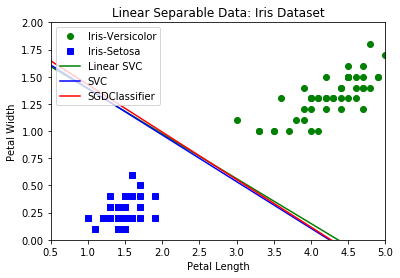

In [12]:
plt.plot(X_ver[:, 0], X_ver[:, 1], "go", label="Iris-Versicolor")
plt.plot(X_set[:, 0], X_set[:, 1], "bs", label="Iris-Setosa")

plt.plot(lin_line[:, 0], lin_line[:, 1], "g-", label="Linear SVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b-", label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Linear Separable Data: Iris Dataset")
plt.axis([0.5, 5, 0, 2])
plt.legend(loc='upper left')
plt.show()



10. Train an SVM regressor on the California housing dataset.

9. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

In [13]:
#The Location to save the dataset
MNIST_PATH = "datasets/MNIST"
MNIST_URL = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
MNIST_MAT = "/mnist-original.mat"

In [14]:
def load_MNIST_data(mnist_path=MNIST_PATH, mnist_mat=MNIST_MAT):
        mnist_raw = loadmat(mnist_path+mnist_mat)
        mnist = {"data": mnist_raw["data"].T,
                 "target": mnist_raw["label"][0],
                 "Col_names": ["target", "data"],
                 "DESCR": "mldata.org dataset: mnist-original",
                }
        print("Data Successfully extracted from mnist.mat!")
        return mnist
        
    
def get_MNIST_data(mnist_path=MNIST_PATH, mnist_url=MNIST_URL, mnist_mat=MNIST_MAT):
    
    print("Checking if directory exists...")
    if not os.path.isdir(mnist_path):
        os.makedirs(mnist_path)
        print("Creating directory")
    
    else: 
        print("Directory exists")
        
        #------------------------------------------------------------------
        #uncomment if connected to internet
        #try:
            #print("\nAttempting to get MNIST data from mldata.org ...")
            #mnist = fetch_mldata('MNIST original')
            #print("\nSuccess!")
            #return mnist
    
        #except urllib.error.HTTPError as ex:
            #print("\nCan't reach mldata.org, attempting alternative...")
            #print("Checking if mnist.mat file exists...")  
            
        #------------------------------------------------------------------
        #followig if, else should fall under 'except' 
            
        if os.path.isfile(mnist_path+mnist_mat):
            print("mnist.mat file does exists...")
            print("extracting data from mnist.mat...")
            
            mnist = load_MNIST_data(mnist_path, mnist_mat)
            print("\nSuccess!")
            return mnist
        
        else:
            print("mnist.mat file doesn't exists...")
            print("downloading mnist.mat file...")
            url_response = urllib.request.urlopen(mnist_url)
            
            print("\nCreating .mat file")
            with open(mnist_path+mnist_mat, "wb") as f:
                contents = url_response.read()
                f.write(contents)
            mnist = load_MNIST_data(mnist_path, mnist_mat)
            print("\nSuccess!")
            return mnist

In [15]:
mnist = get_MNIST_data(MNIST_PATH, MNIST_URL, MNIST_MAT)
mnist    

Checking if directory exists...
Directory exists
mnist.mat file does exists...
extracting data from mnist.mat...
Data Successfully extracted from mnist.mat!

Success!


{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'Col_names': ['target', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original'}

In [16]:
X, y = mnist["data"], mnist["target"]
print("Shape of \"Data\": {}\nShape of \"target\": {}\n".format(X.shape,y.shape))

Shape of "Data": (70000, 784)
Shape of "target": (70000,)



In [17]:
#MNIST is already split into train and test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#Shuffle training set to guarentee cross-validation folds are similar.
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


In [ ]:
#Linear SVM Classifier  
if pickle_exist("lin_clf_mnist") and load_pickle:
    lin_clf_mnist = load_pickle("lin_clf_mnist")
else:
    lin_clf_mnist = LinearSVC(random_state=42)    
    lin_clf_mnist.fit(X_train, y_train)
    save_pickle("lin_clf_mnist", lin_clf_mnist)
    
y_pred_lin = lin_clf_mnist.predict(X_train)
acc_1 = accuracy_score(y_train, y_pred_lin)

notify("Python: Chapter 5", "lin_clf_mnist is complete")

print("Accuracy score of linear SVC: {}%".format(acc_1*100))

In [33]:
#Scale Data
X_train_scale = scale.fit_transform((X_train.astype(np.float32)))
X_test_scale = scale.fit_transform((X_test.astype(np.float32)))

In [ ]:
#Linear SVM Classifier  (Scaled) 
if pickle_exist("lin_clf_mnist_sc") and load_pickle:
    lin_clf_mnist_sc = load_pickle("lin_clf_mnist_sc")
else:
    lin_clf_mnist_sc = LinearSVC(random_state=42)    
    lin_clf_mnist_sc.fit(X_train_scale, y_train)
    save_pickle("lin_clf_mnist_sc", lin_clf_mnist_sc)
    
y_pred_lin_sc = lin_clf_mnist_sc.predict(X_train_scale)
acc_2 = accuracy_score(y_train, y_pred_lin_sc)

notify("Python: Chapter 5", "y_pred_lin_sc is complete")

print("Accuracy score of scaled linear SVC: {}%".format(acc_1*100))

In [ ]:
#One-Vs-One Classifier   
if pickle_exist("ovo_clf") and load_pickle:
    ovo_clf = load_pickle("ovo_clf")
else:
    ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
    ovo_clf.fit(X_train, y_train)
    save_pickle("ovo_clf", ovo_clf)
    
notify("Python: Chapter 5", "ovo_clf is complete")    

#how many classifiers were made during the OvO case? N(N-1)/2
print("There are a total of {} classifiers made.\n".format(len(ovo_clf.estimators_)))    

In [23]:
if (X_train == X_train_scale).all:
    print("yes")
else:
    print("no")

yes


In [25]:
def plot_digits(X):
    rand_digit = X
    rand_digit_img = rand_digit.reshape(28, 28)
    plt.imshow(rand_digit_img, cmap = matplotlib.cm.binary, 
           interpolation="nearest")

    plt.axis("off")
    plt.show()

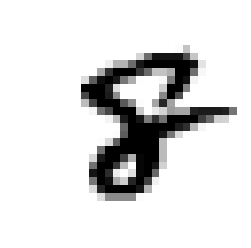

In [31]:
ind = 1000
plot_digits(X_train[ind])